Breathers - Coombes, Helmut, Avitabile

In [1]:
import numpy as np
from scipy.fftpack import fft2
import ConnectivityKernel as ck
import matplotlib.pyplot as plt
from scipy.special import kv
import FiringRate as fr
import NeuralFieldFFT as nf
from scipy.integrate import ode
import InitialConditions as ic
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
nx = 500 # Number of points in the x space grid
Lx = -60
Ux = 60 # x-space grid limits
hx = 2*Ux/nx
xs = np.linspace(Lx, Ux-hx, nx) # nx equally spaced points between -Lx and Lx-hx
xx,yy = np.meshgrid(xs,xs)

In [3]:
p_b = 1
kernel = ck.ConnectivityKernel1(p_b)

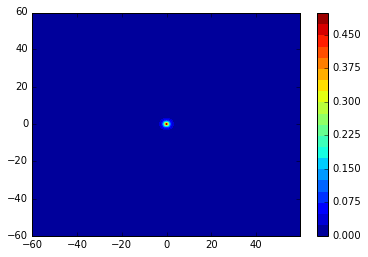

In [4]:
# Plot Kernel
plot_kernel = True
if(plot_kernel):
    w = kernel(xx,yy)
    plt.contourf(xx,yy,w,20)
    plt.colorbar()

In [5]:
w = kernel(xx,yy) # Evaluate kernel at mesh grid points
w_hat = fft2(w) # Compute 2d fft of w

In [11]:
# Initialize Firing Rate
p_mu = 50
p_h = 0.5
f_rate = fr.FiringRate1(p_mu, p_h)

In [12]:
# Initialize Neural Field
p_g = 1
p_alph = 1.2
NeuralField = nf.NeuralFieldFFT(f_rate, w_hat, Ux, nx, p_alph, p_g)

In [13]:
# Initial Conditions
_A = 6; _L = 5.77 # parameters for initial condition 1
#_A = 2; _L = 100 # parameters for initial condition 2
initCond = ic.InitialCondition1(_A, _L)

u0 = initCond(xx, yy) # Evaluate initial condition at mesh grid points
u0 = u0.flatten() # initial condition to vector form
a0 = u0.copy() # a0=u0

v0 = np.concatenate([u0,a0]) # stack u0 on top of a0

In [14]:
method = ode(NeuralField).set_integrator("dopri5")
method.set_initial_value(v0)
final_t = 15
dt = 0.1
vs = []
time_points = []
while method.t < final_t:
    next_t = method.t+dt
    time_points.append(next_t)
    next_v = method.integrate(next_t)
    vs.append(next_v)

NameError: name 'NT' is not defined

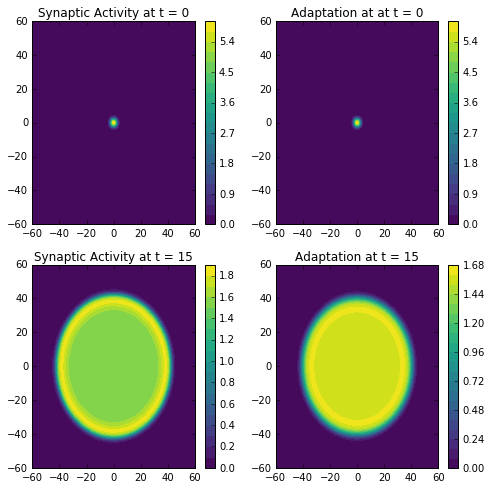

In [15]:
fig = plt.figure(figsize=(8,8))

# Plot initial time of Synaptic Activity
ax1 = fig.add_subplot(221)
uu0 = v0[:nx**2]
uu0 = uu0.reshape((nx,nx))
cont1 = ax1.contourf(xx, yy, uu0, 20, cmap=plt.get_cmap('viridis'))
ax1.set_title("Synaptic Activity at t = 0")
plt.colorbar(cont1)

# Plot initial time of Adaptation
ax2 = fig.add_subplot(222)
aa0 = v0[nx**2:]
aa0 = aa0.reshape( (nx,nx) )
cont2 = ax2.contourf(xx, yy, aa0, 20, cmap=plt.get_cmap('viridis'))
ax2.set_title("Adaptation at at t = 0")
plt.colorbar(cont2)

# Plot final time of Synaptic Activity
ax3 = fig.add_subplot(223)
uun = vs[-1][:nx**2]
uun = uun.reshape((nx,nx))
cont3 = ax3.contourf(xx, yy, uun, 20, cmap=plt.get_cmap('viridis'))
ax3.set_title("Synaptic Activity at t = "+str(final_t))
plt.colorbar(cont3)

# Plot final time of Adaptation
ax4 = fig.add_subplot(224)
aan = vs[-1][nx**2:]
aan = aan.reshape((nx,nx)).T
cont4 = ax4.contourf(xx, yy, aan, 20, cmap=plt.get_cmap('viridis'))
ax4.set_title("Adaptation at t = "+str(final_t))
plt.colorbar(cont4)

plt.savefig("Plots/IC"+str(initCond.num)+"_"+str(nx**2)+"poin_("+str(p_h)+")h.png")